In [1]:
print('all ok')

all ok


### CCA - Complete Case Analysis- Handle Missing values

##### When to use
1. Missing percentage < 5%
2. If no changes in data distribution after apply

##### Benifits
1. Simple easy to use

##### Problems
1. might remove important information
2. no such way to handle missing value in production

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'../Datasets/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
missing_cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
missing_cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
new_df=df.dropna(subset=missing_cols) # remove only those observations if value is missing in missing_cols

In [9]:
new_df.shape

(17182, 13)

In [10]:
new_df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    22.541031
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline          12.530555
experience                 0.000000
company_size              29.786986
company_type              30.799674
training_hours             0.000000
target                     0.000000
dtype: float64

<Axes: >

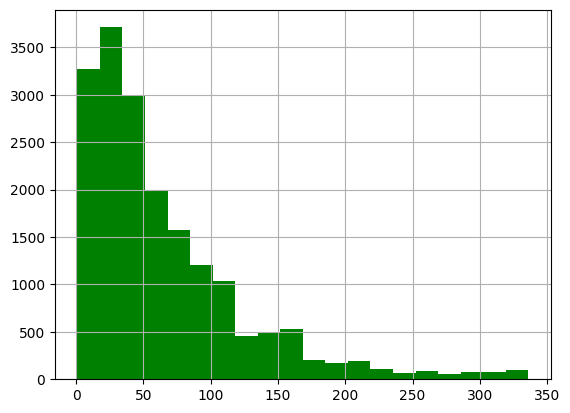

In [11]:
new_df['training_hours'].hist(bins=20,color='red')
df['training_hours'].hist(bins=20,color='green')

<Axes: ylabel='Density'>

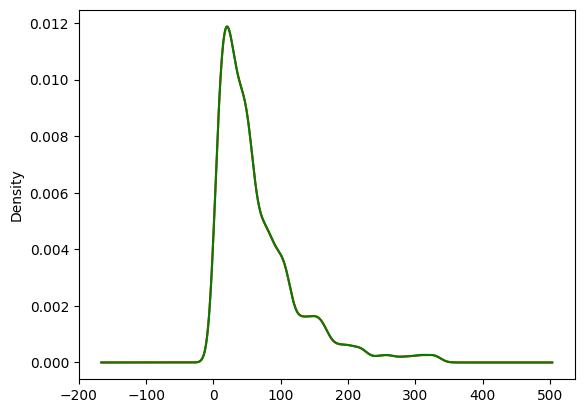

In [12]:
new_df['training_hours'].plot.density(color='red')
df['training_hours'].plot.density(color='green')

<Axes: ylabel='Density'>

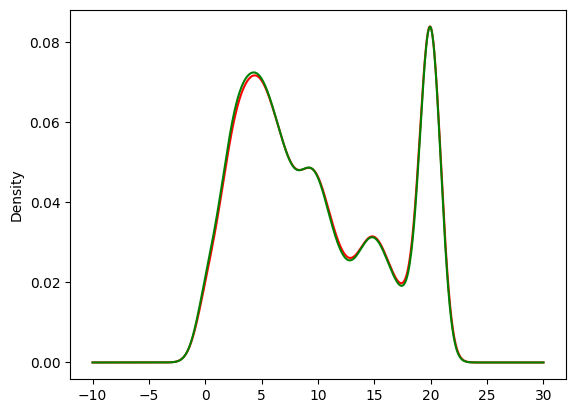

In [13]:
new_df['experience'].plot.density(color='red')
df['experience'].plot.density(color='green')

In [14]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [15]:
temp=pd.concat([df['enrolled_university'].value_counts()/len(df),
                new_df['enrolled_university'].value_counts()/len(new_df)
                ],axis=1)

temp.columns=['original','new']

temp

,original,new
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [16]:
temp=pd.concat([df['education_level'].value_counts()/len(df),
                new_df['education_level'].value_counts()/len(new_df)
                ],axis=1)

temp.columns=['original','new']

temp

,original,new
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


### Imputer (Numerical values- Univariate)

#### Simple Imputer - mean(),median(),mode()
When to use:
1. normal distributed data- mean, right skewed data- median
2. Missing completely at random
3. < 5%

Benifits:
1. Simple 

problems:
1. data distribution may change
2. outlier may come
3. covariance/corelation affected

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [18]:
df=pd.read_csv(r'../Datasets/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [19]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,:-1]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=27)

In [25]:
x_train.isnull().mean()

Age       0.200843
Fare      0.049157
Family    0.000000
dtype: float64

In [26]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [27]:
x_train['mean_age']=x_train['Age'].fillna(mean_age)
x_train['median_age']=x_train['Age'].fillna(median_age)

x_train['mean_fare']=x_train['Fare'].fillna(mean_fare)
x_train['median_fare']=x_train['Fare'].fillna(median_fare)

In [30]:
x_train.sample(5)

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
464,NaN,8.05,0,30.109543,28.5,8.050000,8.0500
21,34.0,13.00,0,34.000000,34.0,13.000000,13.0000
281,28.0,NaN,0,28.000000,28.0,32.502812,14.4542
745,70.0,71.00,2,70.000000,70.0,71.000000,71.0000
665,32.0,73.50,2,32.000000,32.0,73.500000,73.5000


In [31]:
print("Original Age variable variance:",x_train['Age'].var())
print("Impute mean Age variance:",x_train['mean_age'].var())
print("Impute median Age variance:",x_train['median_age'].var())

print("Original Fare variable variance:",x_train['Fare'].var())
print("Impute mean Fare variance:",x_train['mean_fare'].var())
print("Impute median Fare variance:",x_train['median_fare'].var())

Original Age variable variance: 210.9684399316815
Impute mean Age variance: 168.53737536033063
Impute median Age variance: 168.95376882832375
Original Fare variable variance: 2538.9331365581256
Impute mean Fare variance: 2413.9504927050534
Impute median Fare variance: 2429.1978555193396


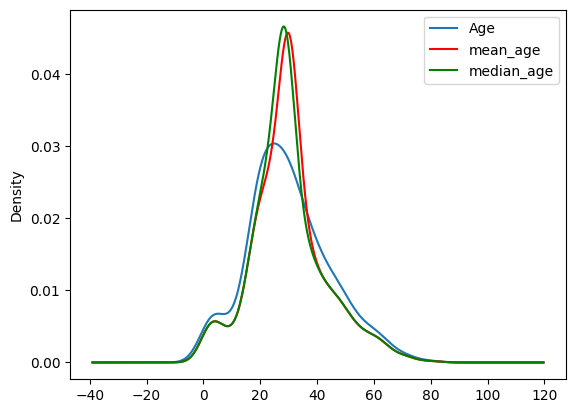

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train['Age'].plot(kind='kde',ax=ax)

x_train['mean_age'].plot(kind='kde',ax=ax,color='red')

x_train['median_age'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

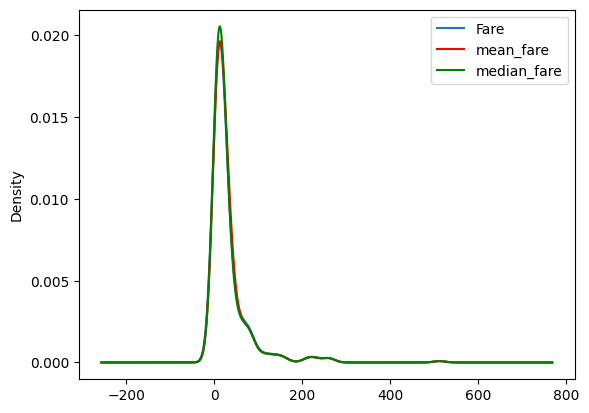

In [34]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train['Fare'].plot(kind='kde',ax=ax)

x_train['mean_fare'].plot(kind='kde',ax=ax,color='red')

x_train['median_fare'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [35]:
x_train.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,210.968440,78.174504,-5.814407,210.968440,210.968440,73.754062,73.656364
Fare,78.174504,2538.933137,16.291762,61.970869,65.807934,2538.933137,2538.933137
Family,-5.814407,16.291762,2.233118,-4.644984,-4.554197,15.489776,15.525215
mean_age,210.968440,61.970869,-4.644984,168.537375,168.537375,58.920263,58.842215
median_age,210.968440,65.807934,-4.554197,168.537375,168.953769,62.568443,62.325757
mean_fare,73.754062,2538.933137,15.489776,58.920263,62.568443,2413.950493,2413.950493
median_fare,73.656364,2538.933137,15.525215,58.842215,62.325757,2413.950493,2429.197856


In [36]:
x_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.098869,-0.274448,1.000000,1.000000,0.096995,0.096461
Fare,0.098869,1.000000,0.214073,0.094130,0.099835,1.000000,1.000000
Family,-0.274448,0.214073,1.000000,-0.239431,-0.234462,0.210972,0.210790
mean_age,1.000000,0.094130,-0.239431,1.000000,0.998767,0.092375,0.091962
median_age,1.000000,0.099835,-0.234462,0.998767,1.000000,0.097973,0.097286
mean_fare,0.096995,1.000000,0.210972,0.092375,0.097973,1.000000,0.996857
median_fare,0.096461,1.000000,0.210790,0.091962,0.097286,0.996857,1.000000


<Axes: >

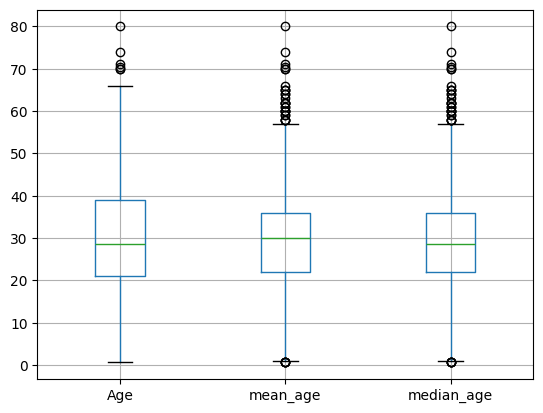

In [37]:
x_train[['Age','mean_age','median_age']].boxplot()

<Axes: >

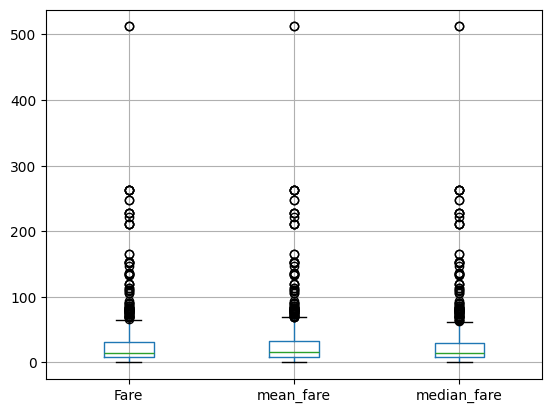

In [38]:
x_train[['Fare','mean_fare','median_fare']].boxplot()

### Impute using Sklearn library

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=27)

In [41]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

In [42]:
trf=ColumnTransformer(transformers=
                      [
                          ('impute1_age',imputer1,['Age']),
                          ('impute2_fare',imputer2,['Fare'])
                      ],remainder='passthrough')

In [49]:
x_train_trans=trf.fit_transform(x_train)

In [50]:
trf.named_transformers_['impute1_age'].statistics_

array([30.10954306])

In [51]:
x_test_trans=trf.transform(x_test)

#### Fill with constant value

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=27)

In [53]:
x_train['age_99']=x_train['Age'].fillna(99)
x_train['age_-1']=x_train['Age'].fillna(-1)

x_train['fare_999']=x_train['Fare'].fillna(999)
x_train['fare_-1']=x_train['Fare'].fillna(-1)

In [54]:
x_train.head()

,Age,Fare,Family,age_99,age_-1,fare_999,fare_-1
129,45.0,6.9750,0,45.0,45.0,6.9750,6.9750
515,47.0,34.0208,0,47.0,47.0,34.0208,34.0208
148,36.5,26.0000,2,36.5,36.5,26.0000,26.0000
345,24.0,13.0000,0,24.0,24.0,13.0000,13.0000
458,50.0,10.5000,0,50.0,50.0,10.5000,10.5000


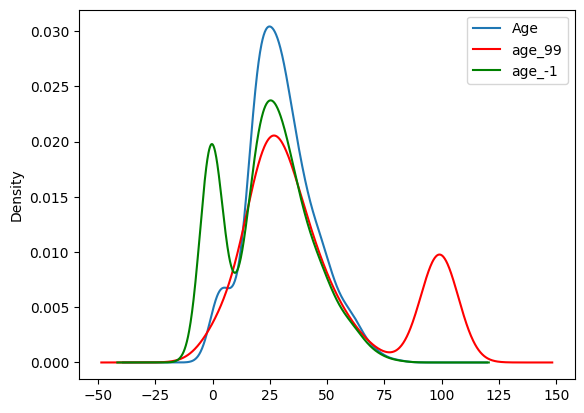

In [55]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train['Age'].plot(kind='kde',ax=ax)

x_train['age_99'].plot(kind='kde',ax=ax,color='red')

x_train['age_-1'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

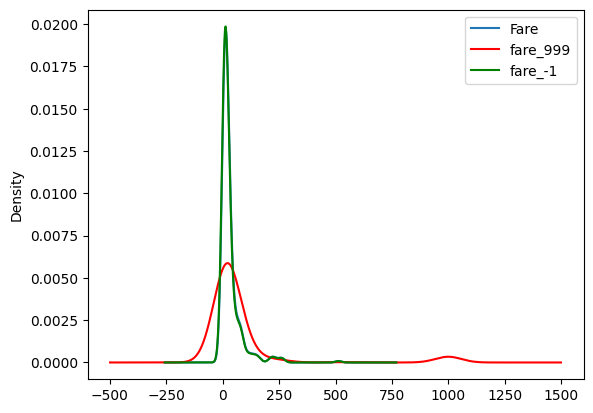

In [56]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train['Fare'].plot(kind='kde',ax=ax)

x_train['fare_999'].plot(kind='kde',ax=ax,color='red')

x_train['fare_-1'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [57]:
x_train.cov()

,Age,Fare,Family,age_99,age_-1,fare_999,fare_-1
Age,210.968440,78.174504,-5.814407,210.968440,210.968440,78.985776,73.572709
Fare,78.174504,2538.933137,16.291762,-102.260309,136.134362,2538.933137,2538.933137
Family,-5.814407,16.291762,2.233118,-8.530748,-2.890251,13.592034,15.555560
age_99,210.968440,-102.260309,-8.530748,931.348188,-175.932626,-470.393664,-84.290869
age_-1,210.968440,136.134362,-2.890251,-175.932626,324.093091,304.014630,123.381224
fare_999,78.985776,2538.933137,13.592034,-470.393664,304.014630,46136.784923,898.335219
fare_-1,73.572709,2538.933137,15.555560,-84.290869,123.381224,898.335219,2466.488021


In [58]:
print("Original Age variable variance:",x_train['Age'].var())
print("Impute Age99 variance:",x_train['age_99'].var())
print("Impute Age-1 variance:",x_train['age_-1'].var())

print("Original Fare variable variance:",x_train['Fare'].var())
print("Impute Fare999 variance:",x_train['fare_999'].var())
print("Impute Fare-1 variance:",x_train['fare_-1'].var())

Original Age variable variance: 210.9684399316815
Impute Age99 variance: 931.3481877113655
Impute Age-1 variance: 324.0930912338612
Original Fare variable variance: 2538.9331365581256
Impute Fare999 variance: 46136.784922598585
Impute Fare-1 variance: 2466.4880211778877


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=27)


In [60]:
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=999)

In [61]:
trf=ColumnTransformer(transformers=
                      [
                          ('impute1_age',imputer1,['Age']),
                          ('impute2_fare',imputer2,['Fare'])
                      ],remainder='passthrough')

In [62]:
trf.fit(x_train)

,transformers,"[('impute1_age', ...), ('impute2_fare', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [63]:
x_train_trans=trf.transform(x_train)
x_test_trans=trf.transform(x_test)

In [66]:
trf.named_transformers_['impute1_age'].statistics_

array([99.])

### Categorical Missing data

In [68]:
df=pd.read_csv(r'../Datasets/train_house.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [69]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [70]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [71]:
df['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [72]:
df.shape

(1460, 3)

Text(0, 0.5, 'No of houses')

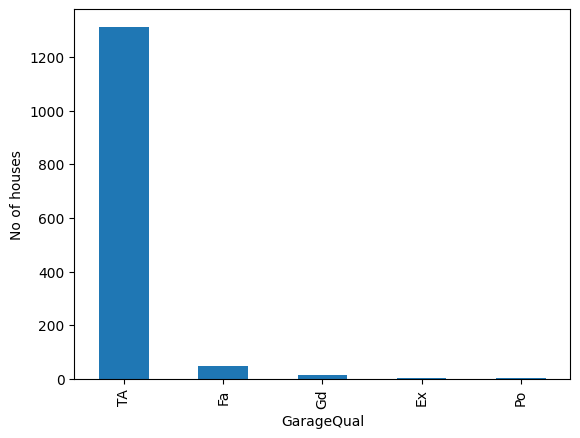

In [73]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('No of houses')

In [74]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

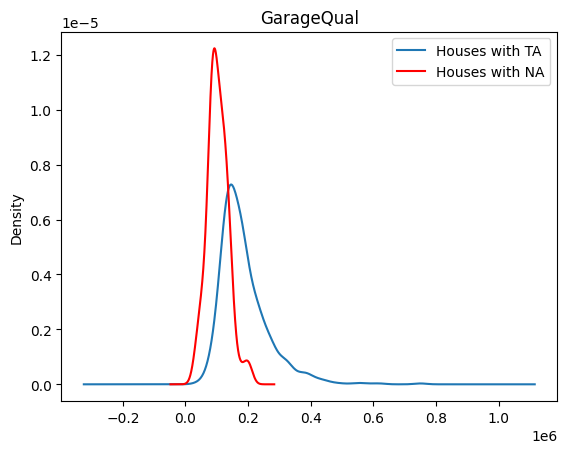

In [75]:
fig=plt.figure()
ax=fig.add_subplot(111)


df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Houses with TA', 'Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [77]:
imputer1=SimpleImputer(strategy='most_frequent')
imputer2=SimpleImputer(strategy='constant',fill_value='missing')

In [79]:
trf=ColumnTransformer(transformers=[
    ('impute_1',imputer1,['GarageQual']),
    ('impute_2',imputer2,['FireplaceQu'])
],remainder='passthrough')

In [80]:
x_train,x_test,y_train,y_test=train_test_split(df[['GarageQual','FireplaceQu']],df['SalePrice'],test_size=0.2,random_state=27)

In [81]:
x_train_trans=trf.fit_transform(x_train)
x_test_trans=trf.transform(x_test)

In [84]:
trf.named_transformers_['impute_1'].statistics_

array(['TA'], dtype=object)

In [85]:
trf.named_transformers_['impute_2'].statistics_

array(['missing'], dtype=object)

### Random Imputation (numerical and categorical)

Randomly select any value which are available in the data column to fill the missing value of this column
Benifits:
1. No changes in data distribution and variance
2. easy to use

problems:
1. good for linear model but not effective for others
2. memory usage will be high for deployment as we have to store missing column in training set 

In [93]:
df=pd.read_csv(r'../Datasets/titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [94]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [96]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df['Survived'],test_size=0.2,random_state=27)

In [97]:
x_train.head()

,Age,Fare
129,45.0,6.9750
515,47.0,34.0208
148,36.5,26.0000
345,24.0,13.0000
458,50.0,10.5000


In [98]:
x_train['Age_impute']=x_train['Age']
x_test['Age_impute']=x_test['Age']

In [100]:
x_train.tail()

,Age,Fare,Age_impute
824,2.0,39.6875,2.0
543,32.0,26.0000,32.0
840,20.0,7.9250,20.0
696,44.0,8.0500,44.0
19,NaN,7.2250,NaN


In [104]:
x_train['Age_impute'][x_train['Age_impute'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

In [105]:
x_test['Age_impute'][x_test['Age_impute'].isnull()]=x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\Hp\AppData\Local\Temp\ipykernel_15784\3673783088.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['Age_impute'][x_test['Age_impute'].isnull()]=x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


In [106]:
x_train.isnull().sum()

Age           143
Fare            0
Age_impute      0
dtype: int64

In [107]:
x_test.isnull().sum()

Age           34
Fare           0
Age_impute     0
dtype: int64

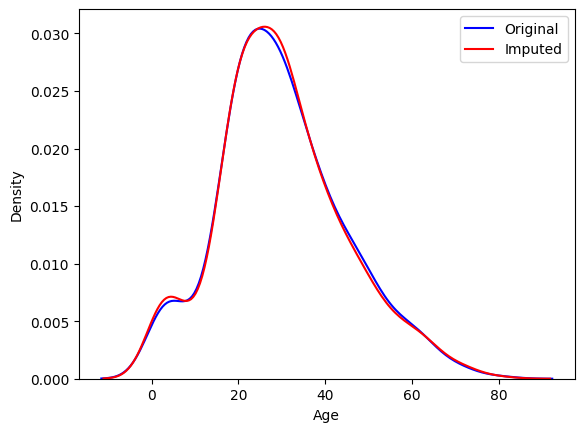

In [120]:
import seaborn as sns
fig=plt.figure()
ax=fig.add_subplot(111)
sns.kdeplot(data=x_train,x='Age',ax=ax,color='blue')
sns.kdeplot(data=x_train,x='Age_impute',ax=ax,color='red')
labels=['Original','Imputed']
ax.legend(labels,loc='best')

In [122]:
print("Variance of Age",x_train['Age'].var())
print("Variance of Imputed Age",x_train['Age_impute'].var())

Variance of Age 210.9684399316815
Variance of Imputed Age 212.14905211760615


In [123]:
x_train.cov()

,Age,Fare,Age_impute
Age,210.968440,78.387246,210.968440
Fare,78.387246,2470.708145,63.174187
Age_impute,210.968440,63.174187,212.149052


<Axes: >

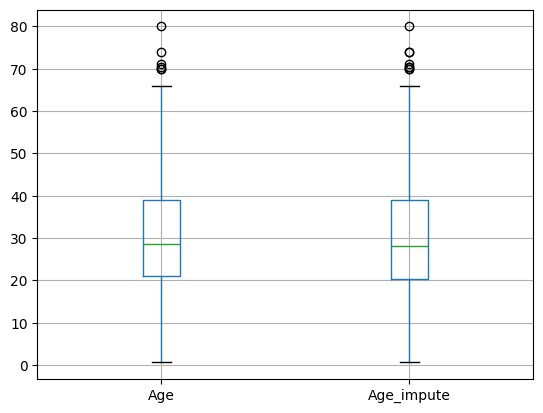

In [124]:
x_train[['Age','Age_impute']].boxplot()

### Missing Indicator

In [125]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [126]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [128]:
si=SimpleImputer()

x_train_trf=si.fit_transform(x_train)
x_test_trf=si.transform(x_test)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf=LogisticRegression()

clf.fit(x_train_trf,y_train)
yPred=clf.predict(x_test_trf)

print("Accuracy with mean imputation:",accuracy_score(y_test,yPred))

Accuracy with mean imputation: 0.6033519553072626


In [130]:
from sklearn.impute import MissingIndicator

In [131]:
mi=MissingIndicator()

mi.fit(x_train)

,missing_values,nan
,features,'missing-only'
,sparse,'auto'
,error_on_new,True


In [132]:
x_train_missing=mi.transform(x_train)
x_test_missing=mi.transform(x_test)

In [133]:
x_train['Age_NA']=x_train_missing
x_test['Age_NA']=x_test_missing

In [134]:
x_train.sample(5)

,Age,Fare,Age_NA
765,51.0,77.9583,False
282,16.0,9.5000,False
752,33.0,9.5000,False
705,39.0,26.0000,False
459,NaN,7.7500,True


In [136]:
si=SimpleImputer()

x_train_trf2=si.fit_transform(x_train)
x_test_trf2=si.transform(x_test)

clf=LogisticRegression()

clf.fit(x_train_trf2,y_train)
yPred=clf.predict(x_test_trf2)

print("Accuracy with mean imputation:",accuracy_score(y_test,yPred))

Accuracy with mean imputation: 0.6256983240223464


### Missing Indicator in SimpleImputer

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [138]:
si=SimpleImputer(add_indicator=True)

x_train=si.fit_transform(x_train)
x_test=si.transform(x_test)

clf=LogisticRegression()

clf.fit(x_train,y_train)
yPred=clf.predict(x_test)

print("Accuracy with mean imputation:",accuracy_score(y_test,yPred))

Accuracy with mean imputation: 0.6256983240223464


### Mean of Age group by Embarked

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


In [49]:
df=pd.read_csv(r'../Datasets/titanic_train.csv',usecols=['Age','Embarked','Survived'])

In [50]:
df.head()

,Survived,Age,Embarked
0,0,22.0,S
1,1,38.0,C
2,1,26.0,S
3,1,35.0,S
4,0,35.0,S


In [51]:
df.isnull().sum()

Survived      0
Age         177
Embarked      2
dtype: int64

In [52]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [53]:
df['Age']=df['Age'].fillna(df.groupby('Survived')['Age'].transform('mean'))

In [54]:
df.isnull().sum()

Survived    0
Age         0
Embarked    2
dtype: int64

In [56]:
df.tail()

,Survived,Age,Embarked
886,0,27.000000,S
887,1,19.000000,S
888,0,30.626179,S
889,1,26.000000,C
890,0,32.000000,Q
